# Golden Search Method

This is one of the algorithms presented in the course which can bracket the minimum of a unimodal function $f:[a,b]\to \Bbb{R}$. The main lines of the algorithm are given below:

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

**Initialization:** Initial segment $S_0 = [a,b]$, iteration number $i=1$, define $\lambda = \displaystyle \frac{\sqrt{5}+1}{2}$
	
**Step** $i$: Given previous segment $S_{i-1}=[a_{i-1},b_{i-1}]$
 - choose points $x_i^{-},x_i^{+}$: 
  $$ x_i^- = \frac{\lambda}{\lambda+1}a_{i-1}+\frac{1}{\lambda+1}b_{i-1} \quad 
    x_i^+ = \frac{1}{\lambda+1}a_{i-1}+\frac{\lambda}{\lambda+1}b_{i-1}$$
 - compute $f(x_i^-)$ and $f(x_i^+)$ (if they were not computed previously)
 - define the new segment as follows 
	- **if** $f(x_i^-)\leq f(x_i^+)$ then $S_i=[a_{i-1},x_i^+]$
	- **if** $f(x_i^-)\geq f(x_i^+)$ then $S_i=[x_i^-,b_{i-1}]$
 - go to step $i+1$
 </div>
 
 ### Some guiding questions:
 
 **Note:** The code below corresponds to the trisection method (so that you have a nice Notebook which works :) )  You need to **change the relevant parts** so that this code implements the **Gloden Search Method**. The algorithm is written above and in the course. Here are some guidelines:
 
 1) When defining $\lambda=(\sqrt{5}+1)/2$, use the `np.sqrt` function in order to have the full precision.
 
 2) Rename the `Trisection` function to something which illustrates the fact that the new function implements the **Golden Search algorithm**. 
 
3) Change the definition of $x^-$ and $x^+$ in the algorithm following the definitions above. Run the algorithm and observe the history of search intervals. You should note that some search points are common between iterations.
 
 4) Note that only one function evaluation should be done per iteration. Decide which one by looking at the new points $x^-$ and $x^+$ in cases where the new search interval is $[a,x^+]$ or $[x^-,b]$. The graphical representation of the history of search intervals may help you.

In [2]:
import numpy as np
import pylab as plt

a = -2.1      # initial lower bound
b = 2         # initial upper bound 
maxN = 10000   # max number of function evaluations

nfeval = 0    # counter for function evaulations
variant = 1   # change the function


def f(x):
    global variant
    if variant==1:
        return (x+0.1)**2+0.2
    if variant==2:
        return -np.cos(x)
    if variant==3:
        return (x+0.1)**2+1
    if variant==4:
        return np.log(np.abs(x))

Tol = 1e-4  # desired tolerance

va = f(a)     # initial values for the function
vb = f(b)

if variant == 1:
    analytic = -0.1  # analytic solution (if it is known)
if variant == 2:
    analytic = 0
if variant == 3:
    analytic = -0.1
if variant == 4:
    analytic = 0

Below we define a function which applies the Trisection algorithm;

The inputs are: 
- a function
- a starting interval
- a requested tolerance. 

The outputs are:
- two lists of upper and lower bounds for the intervals
- two lists containing the intermediary points $x^-$ and $x^+$ defined in the algorithm

These outputs allow us to find the final precision of the approximation by computing the length of the last interval. They also allow us to visualize the optimization process.

In [3]:
def Trisection(fun,A,B,tol=1e-6,ubFeval=10):
    nfeval = 0
    lbhist = []
    ubhist = []
    x1hist = []
    x2hist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    while ub-lb>tol:
        x1 = 2/3*lb+1/3*ub
        x2 = 1/3*lb+2/3*ub
        v1 = fun(x1)
        nfeval = nfeval+1
        if nfeval>=ubFeval:
            break
        v2 = fun(x2)
        nfeval = nfeval+1
        if v1<=v2:
            ub=x2
        else:
            lb=x1
        x1hist.append(x1)
        x2hist.append(x2)
        lbhist.append(lb)
        ubhist.append(ub)
        if nfeval>=ubFeval:
            break
    return np.array(lbhist),np.array(ubhist),np.array(x1hist),np.array(x2hist),nfeval

Once the function which performs the algorithm is defined we can apply it to the cases which interest us. At the end of the optimization we print the information which is of interest and we plot the optimization process.

In [1]:
lbtab,ubtab,x1s,x2s,nfeval = Trisection(f,a,b,tol=Tol,ubFeval=maxN)

xstar = 0.5*(ubtab[-1]+lbtab[-1])    # approximation of the optimum with the midpoint of the final interval
print("We minimize the function f on the interval [",a,",",b,"]")
print("Number of function evaluations: ",nfeval)
print("Final precision (length of the final interval): ",ubtab[-1]-lbtab[-1])  # length of the final interval
print("Final approximation: ",xstar)
print("Final absolute error (compared to analytic solution): ",abs(xstar-analytic))
print("Final relative error (compared to analytic solution): ",abs(xstar-analytic)/abs(analytic))

# some plotting
plt.figure(1,dpi=150)

xs=np.linspace(a,b)
plt.plot(xs,f(xs))  # plot the function
plt.ylim(bottom=-0.1)
plt.xlim([a,b])
plt.plot(lbtab,f(np.array(lbtab)),'rx')   # plot the values at the intermediary points
plt.plot(ubtab,f(np.array(ubtab)),'rx')
plt.plot(a,va,'bx')
plt.plot(b,vb,'bx')
plt.title('Optimization history')
plt.axis('scaled')
plt.show()

NameError: name 'Trisection' is not defined

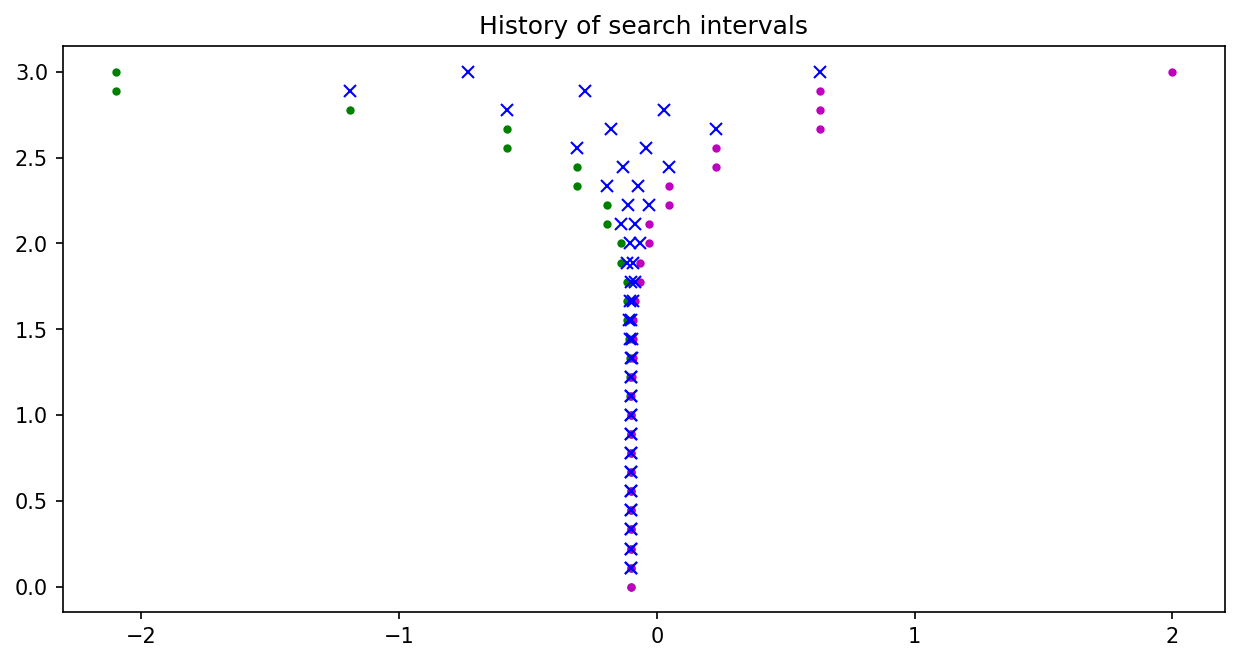

In [5]:
# here we generate a plot of all intermediary points to see their relative position

plt.figure(dpi=150,figsize=(10,5))
h = np.linspace(3,0,lbtab.size)

plt.plot(lbtab,h,'g.')
plt.plot(ubtab,h,'m.')
plt.plot(x1s,h[0:-1],'bx')
plt.plot(x2s,h[0:-1],'bx')
plt.title('History of search intervals')
#plt.axis('scaled')
plt.show()

# Error analysis
Finally, we may study the convergence of the errors. For simplicity, we can choose as a measure of the error the length $|b_i-a_i|$ of the search interval at iteration $i$. In order to see the orders of convergence we usually plot the next errors in terms of the previous ones on a log-log scale. 

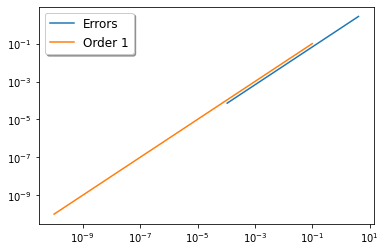

In [6]:
# Error analysis

errors = ubtab-lbtab


plt.figure()

# plot next errors in term of current ones!
plt.loglog(errors[:-1:],errors[1:],label='Errors') 
sq  = 0.1**np.linspace(1,10,10)                    # Construct curve of order 1
plt.loglog(sq,sq,label='Order 1')                  # Plot order curves for comparison

plt.legend(loc='best', shadow=True, fontsize='large')  # Show legend
plt.show()